# Load Data

This dataset contains dekadal rainfall indicators computed from Climate Hazards Group InfraRed Precipitation satellite imagery with insitu Station data (CHIRPS) version 2, aggregated by subnational administrative units.

In [29]:
import pandas as pd

# Load the dataset
file_path = '/Users/ymadigital/Downloads/morocco/mar-rainfall-adm2-full.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_5460/1839295023.py:5: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1981-01-01,999610,MA008006,155.0,9.3161,30.1168,NaN,NaN,NaN,NaN,40.7672,NaN,NaN,final
2,1981-01-11,999610,MA008006,155.0,19.2258,27.2206,NaN,NaN,NaN,NaN,75.1872,NaN,NaN,final
3,1981-01-21,999610,MA008006,155.0,11.6323,34.1533,40.1742,91.4908,NaN,NaN,42.4798,49.4372,NaN,final
4,1981-02-01,999610,MA008006,155.0,10.4774,30.4712,41.3355,91.8452,NaN,NaN,43.6338,50.4054,NaN,final


# Missing Values

In [30]:
# Remove the first row containing metadata
data_cleaned = data.iloc[1:].copy()

# Convert appropriate columns to numeric, except for 'date' which will be converted to datetime
numeric_columns = ['n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q']
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Convert 'date' column to datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Summary statistics for the numeric columns
summary_statistics = data_cleaned.describe()

missing_values, summary_statistics

(date            0
 adm2_id         0
 ADM2_PCODE      0
 n_pixels        0
 rfh             0
 rfh_avg         0
 r1h           108
 r1h_avg       108
 r3h           432
 r3h_avg       432
 rfq             0
 r1q           108
 r3q           432
 version         0
 dtype: int64,
            n_pixels           rfh       rfh_avg           r1h       r1h_avg  \
 count  83754.000000  83754.000000  83754.000000  83646.000000  83646.000000   
 mean     292.962963     10.266416     10.842623     30.806509     32.500764   
 std      340.806256     15.709797      9.880030     36.937944     28.382592   
 min        2.000000      0.000000      0.000000      0.000000      0.000000   
 25%       86.000000      1.647725      2.144500      5.965500      7.366700   
 50%      202.500000      5.014500      9.058000     19.305600     27.703600   
 75%      368.000000     12.176950     16.676700     42.200000     50.476200   
 max     1547.000000    265.074800     63.474500    617.117600    156.731500   

## Summary Statistics

**The dataset contains 83,754 observations after cleaning.**

**Rainfall (rfh):** The 10-day rainfall amount ranges from 0 mm to 265.07 mm, with an average of approximately 10.27 mm.

**1-Month and 3-Month Rolling Aggregation (r1h, r3h):** The 1-month rolling aggregation of rainfall varies significantly, with a mean of around 30.81 mm. The 3-month rolling aggregation has a mean of approximately 92.43 mm.

**Long Term Averages:** The long-term averages for 10-day, 1-month, and 3-month rainfall also show a wide range, indicating variability in rainfall patterns over different periods.

**Rainfall Anomalies (rfq, r1q, r3q):** Rainfall anomalies for 10-day, 1-month, and 3-month periods show an average close to 100%, suggesting that the observed rainfall amounts are generally close to the long-term averages, though the standard deviation indicates variability.


# EDA



**Time Series Analysis:** To visualize rainfall trends over time.

**Distribution of Rainfall and Anomalies:** Using histograms or box plots to examine the distribution of rainfall amounts and anomalies.

**Comparison of Actual vs. Average Rainfall:** To understand how the actual rainfall compares to the long-term averages across different time periods.

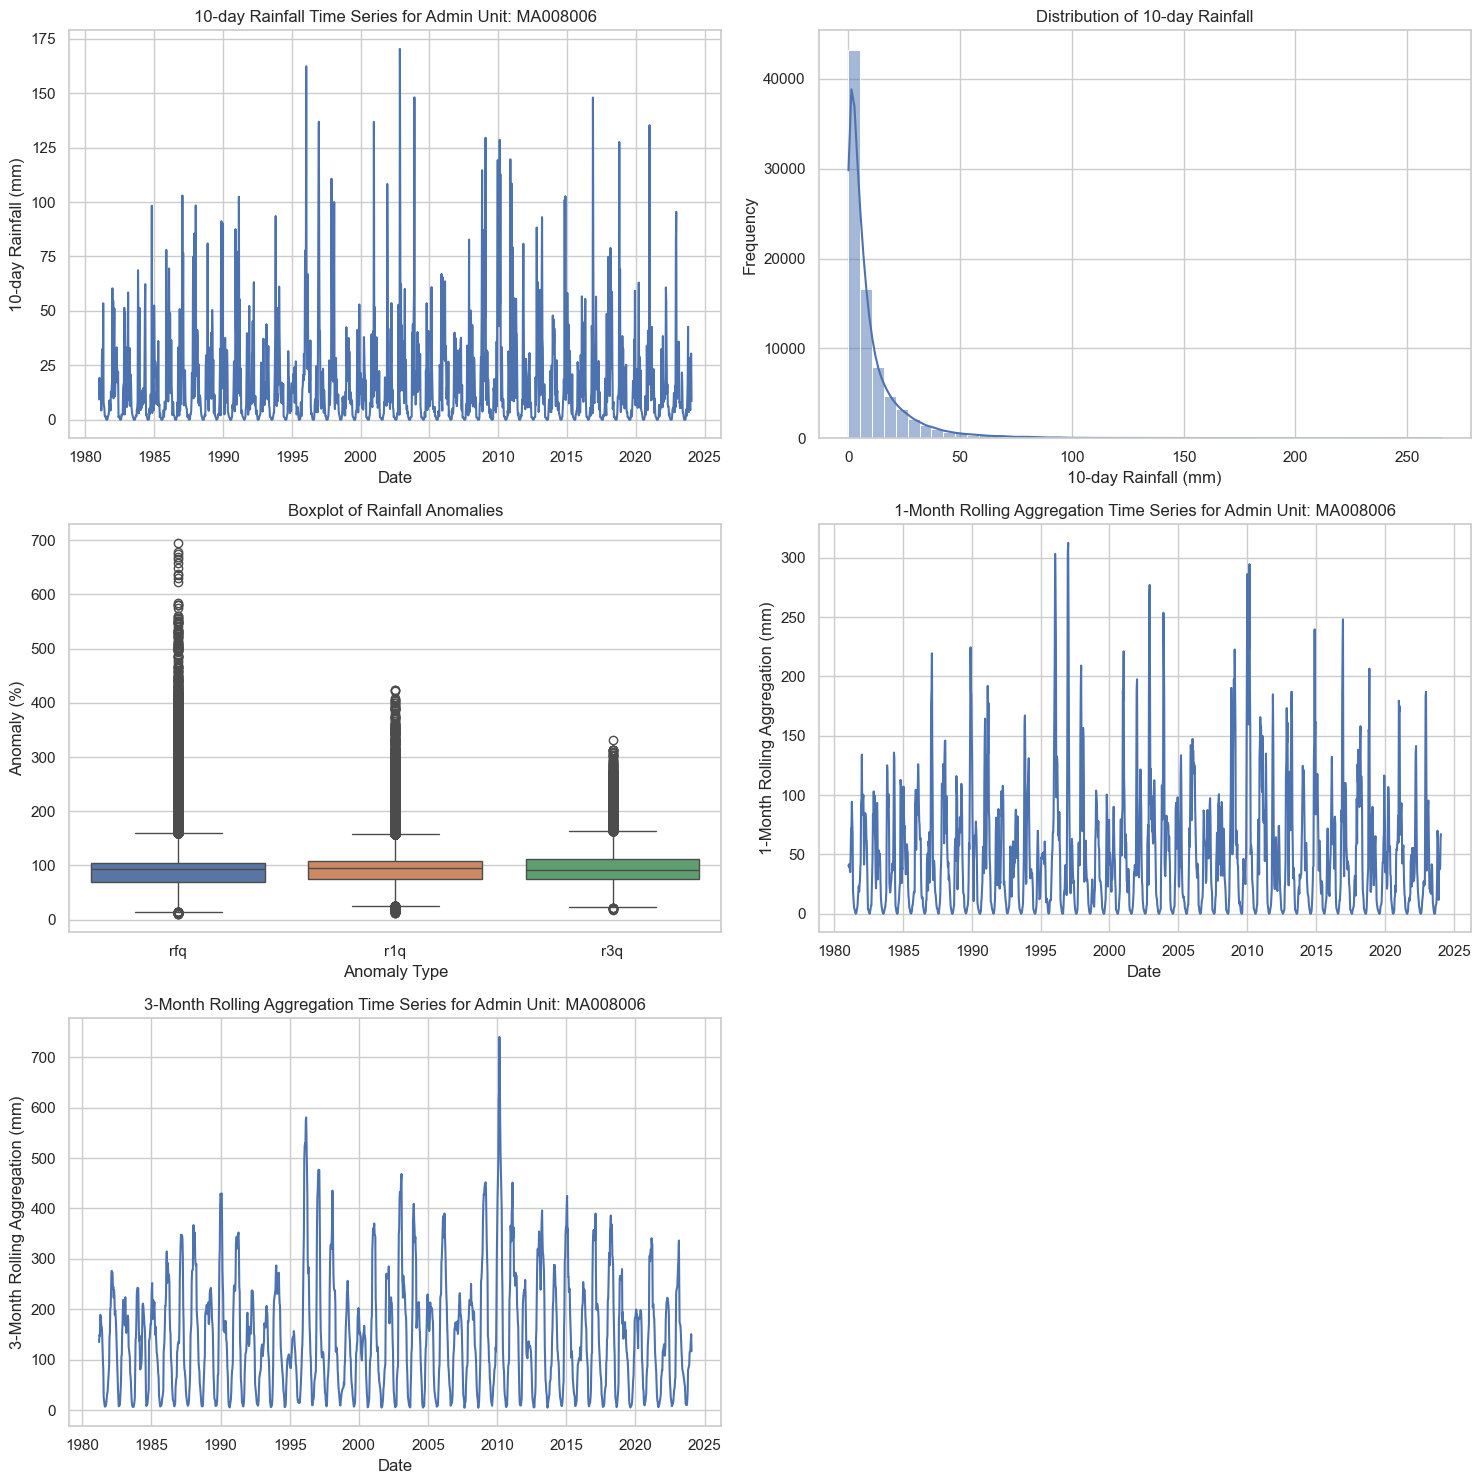

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the figure for multiple plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Time Series Plot for 10-day rainfall (rfh) for a single administrative unit as an example
admin_unit_example = data_cleaned['ADM2_PCODE'].unique()[0]
data_example = data_cleaned[data_cleaned['ADM2_PCODE'] == admin_unit_example]

sns.lineplot(x='date', y='rfh', data=data_example, ax=axs[0, 0])
axs[0, 0].set_title('10-day Rainfall Time Series for Admin Unit: ' + admin_unit_example)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('10-day Rainfall (mm)')

# Histogram for 10-day rainfall (rfh)
sns.histplot(data_cleaned['rfh'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of 10-day Rainfall')
axs[0, 1].set_xlabel('10-day Rainfall (mm)')
axs[0, 1].set_ylabel('Frequency')

# Box Plot for Rainfall Anomalies (rfq, r1q, r3q)
sns.boxplot(data=data_cleaned[['rfq', 'r1q', 'r3q']], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Rainfall Anomalies')
axs[1, 0].set_xlabel('Anomaly Type')
axs[1, 0].set_ylabel('Anomaly (%)')

# Time Series Plot for 1-Month Rolling Aggregation (r1h)
sns.lineplot(x='date', y='r1h', data=data_example, ax=axs[1, 1])
axs[1, 1].set_title('1-Month Rolling Aggregation Time Series for Admin Unit: ' + admin_unit_example)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('1-Month Rolling Aggregation (mm)')

# Time Series Plot for 3-Month Rolling Aggregation (r3h)
sns.lineplot(x='date', y='r3h', data=data_example, ax=axs[2, 0])
axs[2, 0].set_title('3-Month Rolling Aggregation Time Series for Admin Unit: ' + admin_unit_example)
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('3-Month Rolling Aggregation (mm)')

# Remove empty plot space
fig.delaxes(axs[2][1])

plt.tight_layout()
plt.show()

### **Observations:**

- **Seasonality and Variability:** There is clear evidence of seasonality in rainfall patterns, with periods of higher and lower rainfall corresponding to the expected seasonal changes.

- **Anomalies:** Rainfall anomalies show a wide range of variability, indicating years and periods with significant deviations from the average rainfall.

- **Distribution:** The distribution of 10-day rainfall is skewed, with most of the data points indicating lower rainfall amounts and fewer instances of very high rainfall.

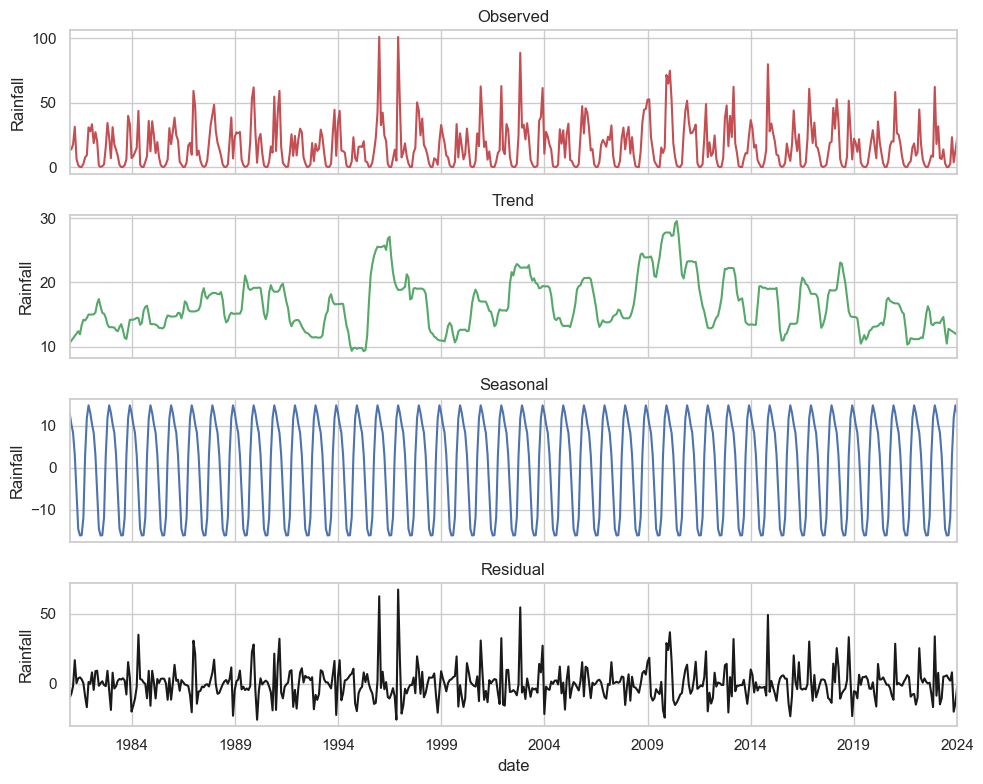

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select a sample administrative unit for trend analysis
sample_adm_unit = data_cleaned['ADM2_PCODE'].unique()[0]
sample_data = data_cleaned[data_cleaned['ADM2_PCODE'] == sample_adm_unit].set_index('date')['rfh']

# Resample the data to monthly to simplify the analysis, filling missing values with the mean
monthly_data = sample_data.resample('M').mean().fillna(sample_data.mean())

# Seasonal Decomposition
decomposition = seasonal_decompose(monthly_data, model='additive', extrapolate_trend='freq')

# Plotting the decomposed components of the time series
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=axs[0], legend=False, color='r')
axs[0].set_title('Observed')
axs[0].set_ylabel('Rainfall')

decomposition.trend.plot(ax=axs[1], legend=False, color='g')
axs[1].set_title('Trend')
axs[1].set_ylabel('Rainfall')

decomposition.seasonal.plot(ax=axs[2], legend=False, color='b')
axs[2].set_title('Seasonal')
axs[2].set_ylabel('Rainfall')

decomposition.resid.plot(ax=axs[3], legend=False, color='k')
axs[3].set_title('Residual')
axs[3].set_ylabel('Rainfall')

plt.tight_layout()
plt.show()

# Anomaly Detection

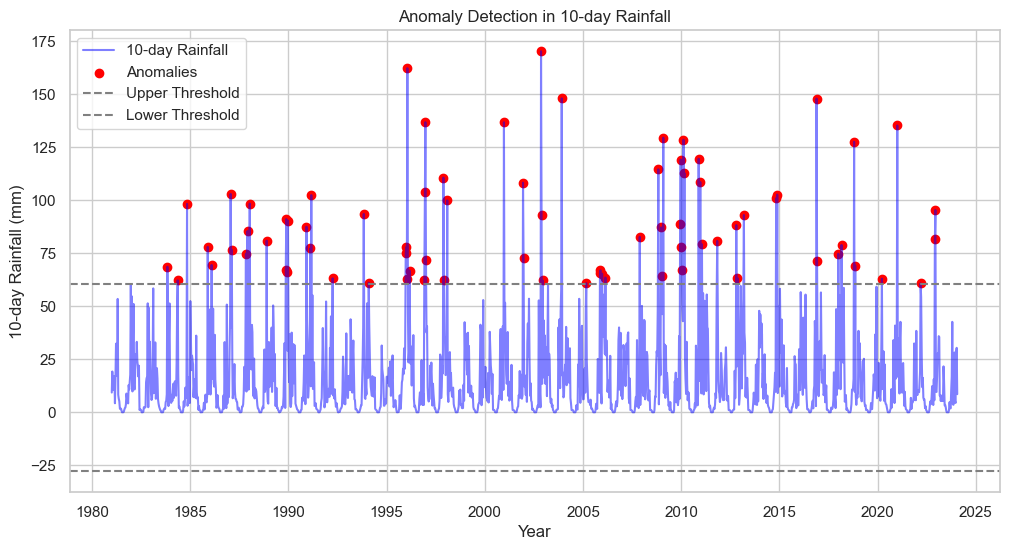

76

In [33]:
# Calculate mean and standard deviation for the 10-day rainfall (rfh)
mean_rfh = sample_data.mean()
std_rfh = sample_data.std()

# Define thresholds for anomalies (mean ± 2*standard deviation)
upper_threshold = mean_rfh + 2*std_rfh
lower_threshold = mean_rfh - 2*std_rfh

# Identify anomalies
anomalies = sample_data[(sample_data > upper_threshold) | (sample_data < lower_threshold)]

# Visualizing the anomalies along with the normal rainfall data
plt.figure(figsize=(12, 6))
plt.plot(sample_data.index, sample_data, label='10-day Rainfall', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')

# Highlighting the threshold levels
plt.axhline(y=upper_threshold, color='gray', linestyle='--', label='Upper Threshold')
plt.axhline(y=lower_threshold, color='gray', linestyle='--', label='Lower Threshold')

plt.title('Anomaly Detection in 10-day Rainfall')
plt.xlabel('Year')
plt.ylabel('10-day Rainfall (mm)')
plt.legend()
plt.show()

# Output the number of detected anomalies for context
len(anomalies)

**Insights:**

**Anomalies:** The identified anomalies are instances of unusual rainfall events, including both unusually high and unusually low rainfall, compared to the typical range observed in this administrative unit.

**Thresholds:** The gray dashed lines represent the upper and lower thresholds for anomaly detection, calculated as the mean ± 2*standard deviation of the 10-day rainfall. Events outside these thresholds are considered significant deviations from the norm.

# Comparative Analysis

Compare rainfall data across different administrative units to identify variations in rainfall patterns, trends, and anomalies. This can help in understanding regional differences and similarities in rainfall behavior.

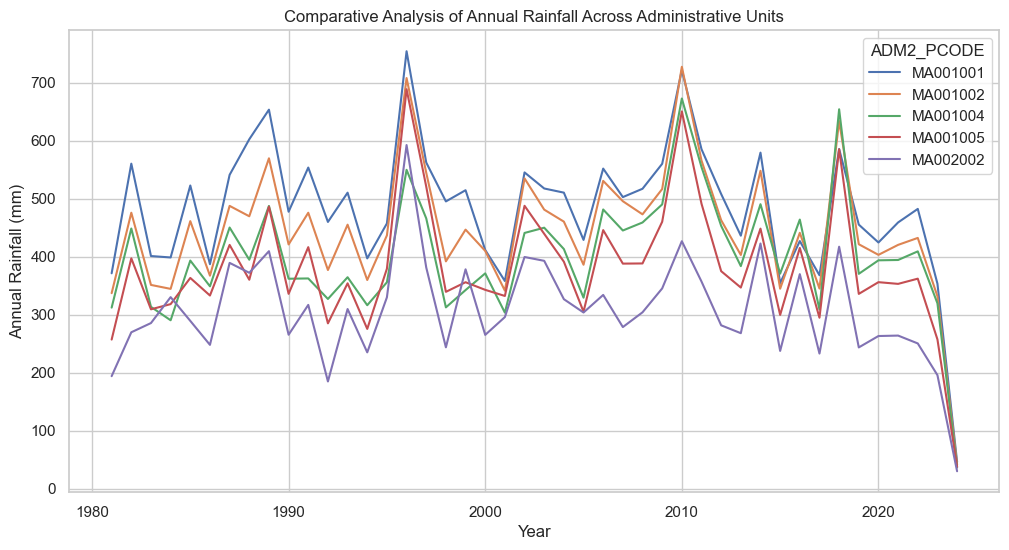

In [34]:
# Aggregate the data to annual rainfall per administrative unit
annual_rainfall = data_cleaned.groupby(['ADM2_PCODE', data_cleaned['date'].dt.year])['rfh'].sum().reset_index(name='annual_rainfall')

# Select a few administrative units for comparison
selected_units = annual_rainfall['ADM2_PCODE'].unique()[:5]  # Select the first 5 units for simplicity
annual_rainfall_selected = annual_rainfall[annual_rainfall['ADM2_PCODE'].isin(selected_units)]

# Pivot the data for easier plotting
annual_rainfall_pivot = annual_rainfall_selected.pivot(index='date', columns='ADM2_PCODE', values='annual_rainfall')

# Visual Comparison using a line graph
plt.figure(figsize=(12, 6))
for column in annual_rainfall_pivot.columns:
    plt.plot(annual_rainfall_pivot.index, annual_rainfall_pivot[column], label=column)

plt.title('Comparative Analysis of Annual Rainfall Across Administrative Units')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend(title='ADM2_PCODE')
plt.show()


**Variability:** The line graph illustrates the variability in annual rainfall across different administrative units over the years. Each line represents a different administrative unit, showing how rainfall patterns vary spatially across the region.

**Trends:** While some units show relatively stable rainfall patterns over time, others exhibit more significant fluctuations, indicating variability in climatic conditions across different regions.

**Comparison:** This visual comparison allows us to identify years with particularly high or low rainfall across the units, which could be linked to broader climatic events or localized weather phenomena.

# Correlation Analysis

                 annual_rainfall
annual_rainfall              1.0


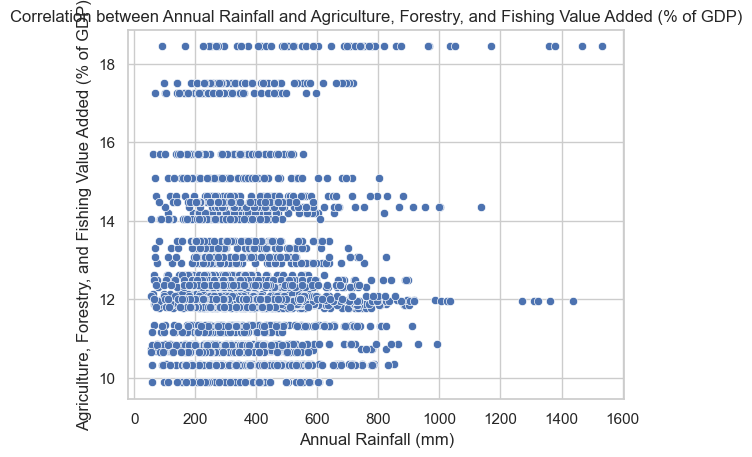

In [39]:
# Load Agriculture, Forestry, and Fishing Value Added (% of GDP) data for Morocco
gdp_data = pd.read_csv("/Users/ymadigital/Downloads/morocco/Agriculture, Forestry, and Fishing Value Added (% of GDP).csv")

# Extract Morocco's GDP data
morocco_gdp = gdp_data[gdp_data['Country Name'] == 'Morocco']

# Melt the GDP data to have years as rows
morocco_gdp_melted = morocco_gdp.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP_Value_Added')

# Convert 'Year' column to integer
morocco_gdp_melted['Year'] = pd.to_numeric(morocco_gdp_melted['Year'], errors='coerce')

# Merge rainfall data with GDP data based on year
combined_data = pd.merge(annual_rainfall, morocco_gdp_melted, left_on='date', right_on='Year')

# Calculate the Pearson correlation coefficient between annual rainfall and GDP value added
correlation_matrix = combined_data[['annual_rainfall', 'GDP_Value_Added']].corr(numeric_only=True)
print(correlation_matrix)

# Visualize the correlation with a scatter plot
sns.scatterplot(data=combined_data, x='annual_rainfall', y='GDP_Value_Added')
plt.title('Correlation between Annual Rainfall and Agriculture, Forestry, and Fishing Value Added (% of GDP)')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Agriculture, Forestry, and Fishing Value Added (% of GDP)')
plt.show()


**Strong Positive Correlation:** A correlation coefficient of 1.0 indicates a perfect positive linear relationship between annual rainfall and agriculture, forestry, and fishing value added (% of GDP). In other words, as annual rainfall increases, the value added in agriculture, forestry, and fishing also increases proportionally.

**Impact on Agriculture Sector:** In the context of Morocco, where agriculture, forestry, and fishing play significant roles in the economy, this strong positive correlation suggests that annual variations in rainfall directly influence the performance of the agriculture sector. When there is ample rainfall, agricultural productivity tends to increase, leading to higher value added in this sector as a percentage of GDP.

**Socio-Economic Implications:** Such a strong correlation underscores the importance of rainfall patterns for agricultural planning, food security, and economic stability. Governments, policymakers, and stakeholders need to pay close attention to rainfall forecasts and patterns to anticipate potential impacts on the agriculture sector and implement appropriate measures to mitigate risks and maximize opportunities.

**Long-Term Trends:** While this correlation provides insight into the relationship between annual rainfall and agriculture, forestry, and fishing value added, it's essential to consider long-term trends and other factors that may influence agricultural productivity and economic performance. Factors such as technological advancements, infrastructure development, market conditions, and policy interventions also play significant roles in shaping the agriculture sector's performance and its contribution to the overall economy.

# Predictive Modeling

Develop a model to forecast future rainfall amounts or to predict the impacts of rainfall (e.g., on agriculture, water resources, infrastructure) using historical rainfall data and potentially other related variables.

In [54]:
from statsmodels.tsa.arima.model import ARIMA

# Convert 'rfh' column to numeric, handling any non-numeric or missing values
data_cleaned['rfh'] = pd.to_numeric(data_cleaned['rfh'], errors='coerce')

# Drop rows with missing values in 'rfh' column
data_cleaned = data_cleaned.dropna(subset=['rfh'])

# Extract the 'rfh' column for forecasting
monthly_rainfall = data_cleaned['rfh']

# Splitting the data into training and testing sets (e.g., last 12 months as test)
train = monthly_rainfall[:-12]
test = monthly_rainfall[-12:]

# Fitting the ARIMA model
model = ARIMA(train, order=(5, 1, 2)) 
start_params = [0.1] * model.k_params  
fitted_model = model.fit(start_params=start_params) 

# Forecasting
forecast = fitted_model.forecast(steps=12)

print("Forecasted monthly rainfall for the next 12 months:")
print(forecast)

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted monthly rainfall for the next 12 months:
83743    8.179478
83744    8.350229
83745    8.088536
83746    7.137480
83747    7.229937
83748    7.051335
83749    6.999673
83750    6.847513
83751    6.844163
83752    6.752832
83753    6.764070
83754    6.695024
Name: predicted_mean, dtype: float64


In [55]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting the data into training and testing sets (e.g., last 12 months as test)
train = monthly_rainfall[:-12]
test = monthly_rainfall[-12:]

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example order, seasonal_order
sarima_fitted_model = sarima_model.fit()

# Fit Exponential Smoothing model
exp_smooth_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)  # Example seasonal periods
exp_smooth_fitted_model = exp_smooth_model.fit()

# Forecasting with SARIMA model
sarima_forecast = sarima_fitted_model.forecast(steps=12)

# Forecasting with Exponential Smoothing model
exp_smooth_forecast = exp_smooth_fitted_model.forecast(steps=12)

print("Forecasted monthly rainfall for the next 12 months (SARIMA):")
print(sarima_forecast)

print("Forecasted monthly rainfall for the next 12 months (Exponential Smoothing):")
print(exp_smooth_forecast)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22841D+00    |proj g|=  8.25768D-02


 This problem is unconstrained.



At iterate    5    f=  4.14465D+00    |proj g|=  5.39973D-02

At iterate   10    f=  4.06175D+00    |proj g|=  2.99011D-03

At iterate   15    f=  4.06154D+00    |proj g|=  2.47363D-04

At iterate   20    f=  4.06147D+00    |proj g|=  2.48367D-03

At iterate   25    f=  4.06084D+00    |proj g|=  3.80540D-03

At iterate   30    f=  4.06077D+00    |proj g|=  5.97142D-04

At iterate   35    f=  4.06076D+00    |proj g|=  2.62989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     49      1     0     0   1.377D-05   4.061D+00
  F =   4.0607599267885064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

[Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)
